<a href="https://colab.research.google.com/github/Carlosmagnobrusil/CarlosBrusil_projects/blob/main/Semana_9/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ejercicio de analisis de componentes principales**
## *Creado por: Carlos Brusil*



*   Fecha de Creación: 3 de marzo de 2022 
*   Fechad de actualización: 3 de enero de 2022
*   Descripción: Este script busca poner en practica los conocimientos de vizualizacion y generacion de componentes pricipales aplicados a los datos entregados

In [7]:
# cargar el conjunto de datos
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

In [3]:
X = mnist.data
X.shape

(70000, 784)

In [19]:
le = LabelEncoder()
y = le.fit_transform(mnist.target)  #codifico mis variable obejetivo 
y.shape

(70000,)

In [18]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X) #escalo mis datos recordemos que el escalamiento ed datos se realiza unicamente 
#a la matriz de caracteristicas

In [25]:
pca = PCA(n_components= 0.95)
pcs = pca.fit_transform(scaled_df)

In [26]:
pca.get_covariance()

array([[7.94869360e-02, 1.24959818e-32, 3.51595343e-32, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.24959818e-32, 7.94869360e-02, 5.50683609e-31, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.51595343e-32, 5.50683609e-31, 7.94869360e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.94869360e-02, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.94869360e-02, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 7.94869360e-02]])

In [27]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.05642719, 0.04041226, 0.03738273, 0.02893   , 0.02520752,
       0.02192549, 0.01914282, 0.01740684, 0.01532232, 0.01396087,
       0.01342175, 0.01201421, 0.01113962, 0.01090582, 0.01027986,
       0.00994955, 0.00931255, 0.00919635, 0.008886  , 0.00863195,
       0.00821741, 0.00798417, 0.00762573, 0.00742315, 0.0071657 ,
       0.00689314, 0.00681399, 0.00654588, 0.00627293, 0.00610345,
       0.00597261, 0.00589304, 0.00567358, 0.00559358, 0.00552473,
       0.00534443, 0.00527593, 0.00515841, 0.00505498, 0.00477438,
       0.00476312, 0.00465155, 0.00453454, 0.00445757, 0.00442313,
       0.00437877, 0.00437294, 0.00427724, 0.00424808, 0.00418524,
       0.00404059, 0.00396258, 0.00393176, 0.00390562, 0.00386444,
       0.00377501, 0.00373883, 0.00368328, 0.00360377, 0.0035637 ,
       0.00349289, 0.00344527, 0.00343239, 0.00341   , 0.00334463,
       0.00332107, 0.00329803, 0.00319433, 0.0031711 , 0.00315431,
       0.00309941, 0.00305782, 0.00305095, 0.0030396 , 0.00296

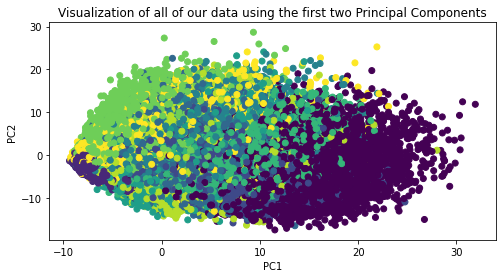

In [28]:
plt.figure(figsize = (8, 4))
plt.scatter(pcs[:,0], pcs[:,1], c = y)
plt.title('Visualization of all of our data using the Principal Components  at 95% ')
plt.xlabel('PC1')
plt.ylabel('PC2');

Text(0, 0.5, 'Proportion of Explained Variance')

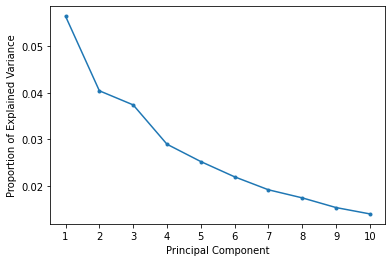

In [29]:
plt.plot(range(1, 11), pca.explained_variance_ratio_[:10], marker = '.')
plt.xticks(ticks = range(1, 11))
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [33]:
# Instanciar Escalador Estándar
scaler = StandardScaler()
# Ajustar y transformar datos
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [34]:
from sklearn.linear_model import LogisticRegression

In [40]:
pca = PCA(n_components = 4)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)
# ajustar regresión logística
logreg = LogisticRegression()
logreg.fit(X_train_pca, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [41]:
print('Training accuracy:', logreg.score(X_train_pca, y_train))
print('Testing accuracy:', logreg.score(X_test_pca, y_test))

Training accuracy: 0.6150857142857142
Testing accuracy: 0.612
